In [ ]:

function for the support vector machine
y=1,    if WX+b>=0 
y=0,    if WX+b<0

In [ ]:

Hyperplane: In SVM, the hyperplane represents the decision boundary that separates data points belonging 
to different classes. For a binary classification problem, this hyperplane aims to maximize the margin 
between the closest points of different classes.
Margin: The margin is the distance between the hyperplane and the nearest data points (support vectors).
The SVM algorithm seeks to find the hyperplane that maximizes this margin.

objective function is 

min 1/2(||b||^2)  where yi*(WX+b)>0
where b is the bias

In [ ]:

The kernel trick is a method used in Support Vector Machines (SVMs) to handle non-linearly separable
data by implicitly mapping the input data into a higher-dimensional feature space. This allows SVMs to
construct a linear decision boundary in the higher-dimensional space, which corresponds to a non-linear
decision boundary in the original input space.

In [ ]:
Support vectors are the data points that lie closest to the decision boundary (hyperplane) in a Support
Vector Machine (SVM). These points are crucial because they define the margin, which is the separation
between the two classes. In essence, support vectors "support" the decision boundary and are instrumental
in determining its optimal position.

Consider a simple example where you have two classes, red and blue, that are not linearly separable in
two-dimensional space. By using a non-linear kernel (e.g., polynomial or RBF), the SVM can map the data
into a higher-dimensional space where the classes become linearly separable. In this higher-dimensional 
space, the decision boundary is a hyperplane that separates the red and blue points.

Now, the support vectors are the points from both classes that lie closest to this hyperplane. These points
are critical because they define the margin; any change in their position would affect the hyperplane and
the margin. Other points that are not support vectors do not influence the hyperplane and can be ignored
once the model is trained.

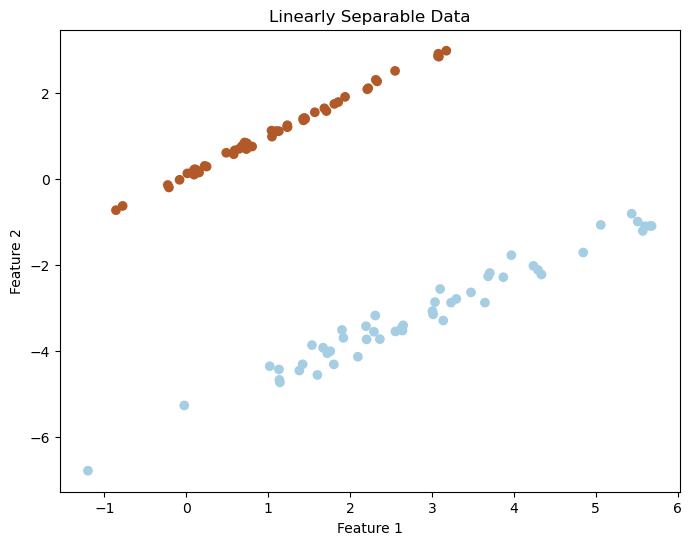

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, random_state=42)

X[y == 0] *= 3

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data')
plt.show()


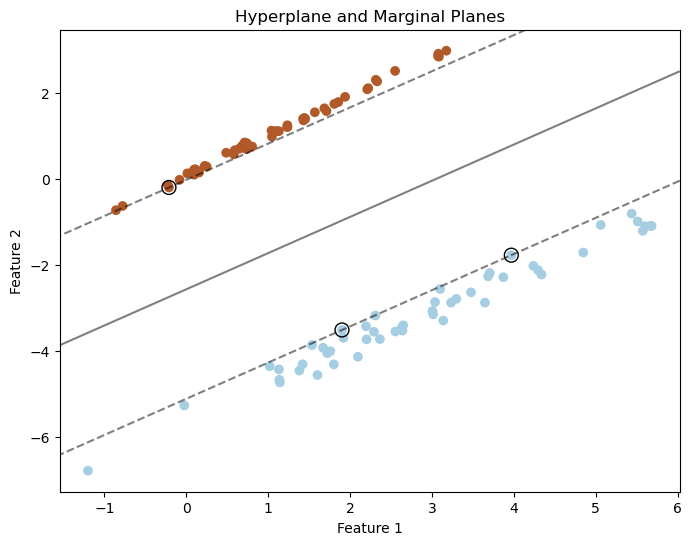

In [3]:
from sklearn.svm import SVC


svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)


plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)


ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)


ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hyperplane and Marginal Planes')
plt.show()


In [6]:
def plot_decision_boundary(model, plt):
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()


    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)


    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

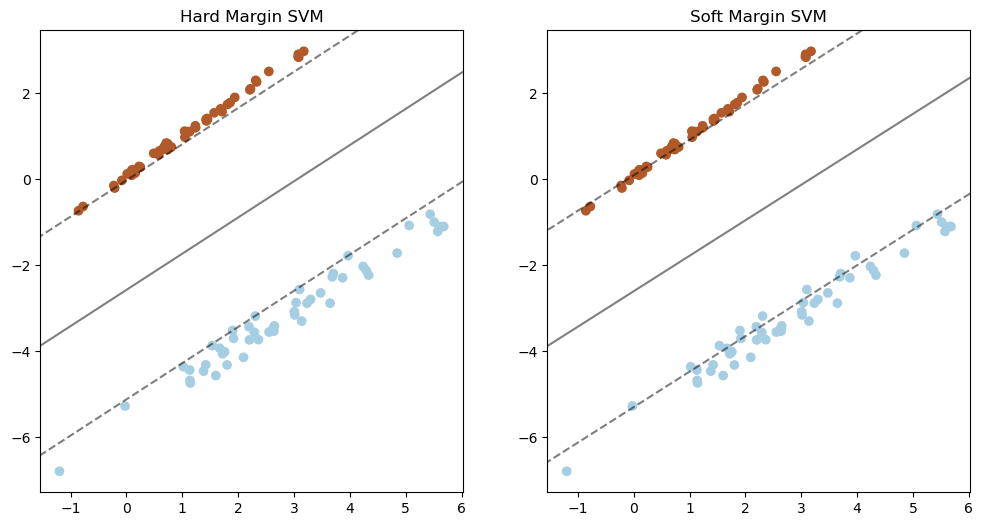

In [7]:

svm_hard = SVC(kernel='linear', C=1000)  # Hard margin
svm_soft = SVC(kernel='linear', C=0.01)  # Soft margin
svm_hard.fit(X, y)
svm_soft.fit(X, y)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plot_decision_boundary(svm_hard, plt)
plt.title('Hard Margin SVM')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plot_decision_boundary(svm_soft, plt)
plt.title('Soft Margin SVM')

plt.show()


Accuracy: 0.8


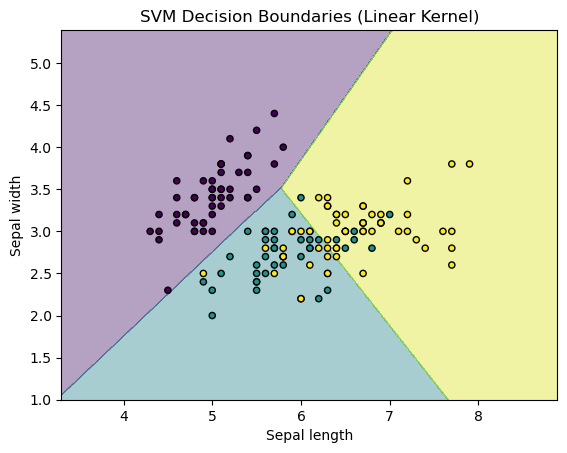

Accuracy for C=0.1: 0.8222222222222222
Accuracy for C=1: 0.8
Accuracy for C=10: 0.8
Accuracy for C=100: 0.8


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundaries (Linear Kernel)')
plt.show()

C_values = [0.1, 1, 10, 100]
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for C={C}: {accuracy}")
